In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

N = 100
w_true = 5
b_true = 2
noise_scale = 5
x_np = 15 * np.random.rand(N, 1)
noise = np.random.normal(scale = noise_scale, size = (N, 1))

# Convert shape of y_np to (N,)
y = np.reshape(x_np * w_true + b_true + noise, (N, 1))

In [2]:
y.shape

(100, 1)

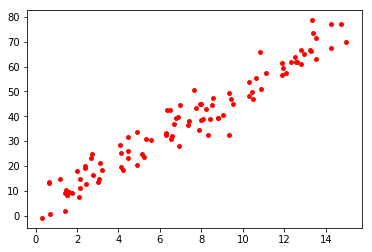

In [3]:
plt.scatter(x_np, y, s = 15, c='r')
plt.show()

In [4]:
learning_rate = 0.01
epochs = 10000

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal((1, 1)), name = "W")
b = tf.Variable(tf.random_normal((1,)), name = "Bias")

y_model = tf.matmul(X, W) + b
loss = tf.reduce_sum((Y - y_model)**2)
# AdagradOptimizer
train_op = tf.train.AdagradOptimizer(learning_rate).minimize(loss)

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        _, final_loss = sess.run([train_op, loss], feed_dict={X: x_np, Y: y})
        if(epoch%1000 == 0):
            print("step %d, loss: %f" % (epoch, final_loss))
    # Added here in case if  have some troubles with extracting variables
    tvars = tf.trainable_variables()
    tvars_vals = sess.run(tvars)
    for var, val in zip(tvars, tvars_vals):
        print(var.name, val)
    final_b = sess.run(b)
    final_w = sess.run(W)
    final_y_model = sess.run(y_model, feed_dict = {X: x_np})

print(final_b, final_w)
#  should be [2, 5]

step 0, loss: 93984.585938
step 1000, loss: 63828.832031
step 2000, loss: 53422.015625
step 3000, loss: 46323.820312
step 4000, loss: 40908.664062
step 5000, loss: 36549.542969
step 6000, loss: 32926.394531
step 7000, loss: 29849.894531
step 8000, loss: 27197.246094
step 9000, loss: 24883.546875
W:0 [[3.0768178]]
Bias:0 [2.835557]
[2.835557] [[3.0768178]]


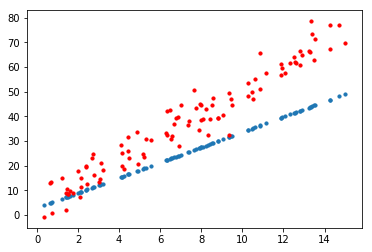

In [6]:
plt.scatter(x_np, final_y_model, s = 10)
plt.scatter(x_np, y, c='r', s = 10)
plt.show()

In [7]:
# AdamOptimizer
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [8]:
W = tf.Variable(tf.zeros((1, 1)))
b = tf.Variable(tf.zeros((1,)))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        _, final_loss = sess.run([train_op, loss], feed_dict={X: x_np, Y: y})
        if(epoch%1000 == 0):
            print("step %d, loss: %f" % (epoch, final_loss))
            
    # Added here in case if  have some troubles with extracting variables
    tvars = tf.trainable_variables()
    tvars_vals = sess.run(tvars)
    for var, val in zip(tvars, tvars_vals):
        print(var.name, val)
    # Like here AdamOptimizer has some problems with extracting trained variables!
    # Damn stupid code!
    final_b = sess.run(b)
    final_w = sess.run(W)
    final_y_model = sess.run(y_model, feed_dict = {X: x_np})


print(final_b, final_w)
#  should be [2, 5]

step 0, loss: 241812.781250
step 1000, loss: 2849.326172
step 2000, loss: 2484.323242
step 3000, loss: 2455.063965
step 4000, loss: 2434.755615
step 5000, loss: 2426.923828
step 6000, loss: 2425.684082
step 7000, loss: 2425.634766
step 8000, loss: 2425.634521
step 9000, loss: 2425.634521
W:0 [[4.720193]]
Bias:0 [3.5742774]
Variable:0 [[0.]]
Variable_1:0 [0.]
[0.] [[0.]]


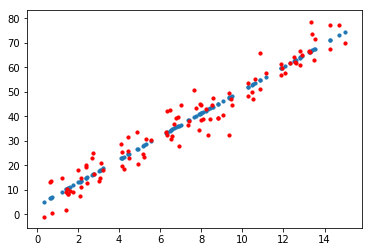

In [9]:
plt.scatter(x_np, final_y_model, s = 10)
plt.scatter(x_np, y, c='r', s = 10)
plt.show()